# Assignment 1 - KMeans - Kieran Gregg

# Dataset 1 (blobs)



### PART ONE : EDA

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

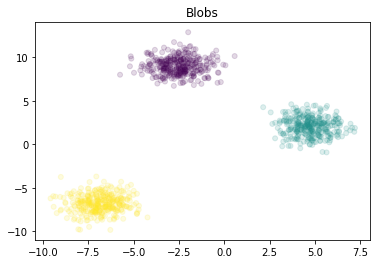

In [2]:
# setting up a generated blobs dataset for 2d plotting
from sklearn.datasets import make_blobs
blobs, labels = make_blobs(n_samples=1000, n_features=2, random_state=42)

# the figure printed below plots the blobs dataset, which can be seen to have mostly distinct shapes
plt.scatter(blobs[:, 0], blobs[:, 1], c=labels, s=25, alpha=0.15)
plt.title("Blobs")
plt.show()

### PART TWO : Implement KMeans

In [3]:
# running the built in KMeans algorithm on our blobs dataset, with 3 clusters
kmeans = KMeans(n_clusters=3).fit(blobs)
centers = kmeans.cluster_centers_
print(centers)

[[ 4.7286341   2.05557266]
 [-6.86656253 -6.78519427]
 [-2.52414179  9.00394283]]


In [4]:
# Running my Java Kmeans
import os

input_path = "blobs.csv"
labels_output_path = "blobs_labels_output.csv"
centers_output_path = "blobs_centers_output.csv"
random_state = 42
num_centroids = 3
num_max_iterations = 100

cwd = os.getcwd()
os.chdir(cwd)
os.system('javac KMeans.java')   
run_command = "java " + "KMeans " + input_path + " " + labels_output_path + " " + centers_output_path + " " + str(random_state) + " " + str(num_centroids) + " " + str(num_max_iterations) 
os.system(run_command)

args [blobs.csv, blobs_labels_output.csv, blobs_centers_output.csv, 42, 3, 100]

centroid: 0 at coordinates: 4.728634099184566, 2.0555726610160057
centroid: 1 at coordinates: -2.524141786876686, 9.003942833455842
centroid: 2 at coordinates: -6.866562533911905, -6.785194271441719

centroid: 0 at coordinates: 4.728634099184566, 2.0555726610160057
centroid: 1 at coordinates: -2.524141786876686, 9.003942833455842
centroid: 2 at coordinates: -6.866562533911905, -6.785194271441719

iterations: 2


0

### PART THREE : Comparing Implemented KMeans to Sklearn's KMeans

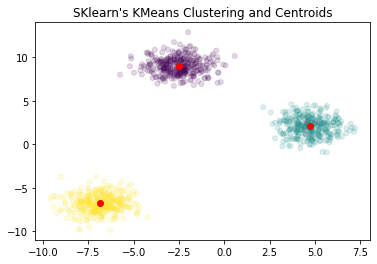

In [5]:
# plotting the blobs dataset 
plt.scatter(blobs[:,0], blobs[:,1], s=25, c=labels, alpha=0.15)
# plotting the centers of our cluster from sklearn's kmeans
plt.scatter(centers[:,0], centers[:,1], color='red')

plt.title("SKlearn's KMeans Clustering and Centroids")
plt.show()

In [6]:
blobs_df = pd.DataFrame(blobs)
blobs_df.to_csv("blobs.csv", header=None, index=False)

In [7]:
output_labels = pd.read_csv("blobs_labels_output.csv", header=None)
output_labels_ndarray = output_labels.to_numpy().flatten()

In [8]:
from sklearn.metrics import v_measure_score

score = v_measure_score(labels, output_labels_ndarray)
score

1.0

In [9]:
output_centers = pd.read_csv("blobs_centers_output.csv", header=None)
output_centers_ndarray = output_centers.to_numpy()
output_centers_ndarray

array([[ 4.7286341 ,  2.05557266],
       [-2.52414179,  9.00394283],
       [-6.86656253, -6.78519427]])

In [10]:
centers

array([[ 4.7286341 ,  2.05557266],
       [-6.86656253, -6.78519427],
       [-2.52414179,  9.00394283]])

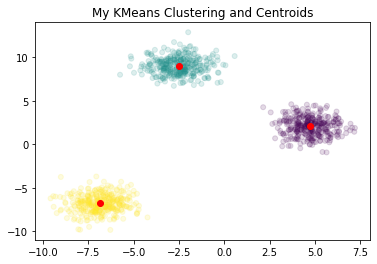

In [11]:
# plotting the blobs dataset 
plt.scatter(blobs[:,0], blobs[:,1], s=25, c=output_labels_ndarray, alpha=0.15)
# plotting the centers of our cluster from sklearn's kmeans
plt.scatter(output_centers_ndarray[:,0], output_centers_ndarray[:,1], color='red')

plt.title("My KMeans Clustering and Centroids")
plt.show()